### 1. Importing the necessary modules and loading the dataset

To begin, NumPy, Pandas, Matplotlib, and Seaborn are imported. NumPy and Pandas are used for data manipulation and analysis, while Matplotlib and Seaborn are used for data visualization. Next, the CSV dataset is read into a Pandas DataFrame named 'results'.

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
results=pd.read_csv(r"C:\Users\A\Downloads\archive\results.csv")

### 2.DataSet description 

In [39]:
#Show the first 5 rows of the DataFrame(5 is the default number of rows)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [40]:
#Show the last 5 rows of the DataFrame(5 is the default number of rows)
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
47593,2024-09-10,Kuwait,Iraq,0,0,FIFA World Cup qualification,Kuwait City,Kuwait,False
47594,2024-09-10,Palestine,Jordan,1,3,FIFA World Cup qualification,Kuala Lumpur,Malaysia,True
47595,2024-09-10,Bahrain,Japan,0,5,FIFA World Cup qualification,Riffa,Bahrain,False
47596,2024-09-10,Indonesia,Australia,0,0,FIFA World Cup qualification,Jakarta,Indonesia,False
47597,2024-09-10,China PR,Saudi Arabia,1,2,FIFA World Cup qualification,Dalian,China PR,False


The five most recent matches correspond to the last matche FIFA World Cup, which means the dataset is up to date.

In [41]:
type(results)

pandas.core.frame.DataFrame

In [42]:
# View the number of records (rows) and attributes (columns) in the DataFrame
results.shape

(47598, 9)

The data set has 47598 records (rows), each one corresponding to a match, and 9 fields (columns).

In [43]:
# View the column names of the DataFrame
print(results.columns)

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')


results.csv includes the following columns:

date - date of the match

home_team - the name of the home team

away_team - the name of the away team

home_score - full-time home team score including extra time, not including penalty-shootouts

away_score - full-time away team score including extra time, not including penalty-shootouts

tournament - the name of the tournament

city - the name of the city/town/administrative unit where the match was played

country - the name of the country where the match was played

neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

In [44]:
# General information about the DataFrame
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47598 entries, 0 to 47597
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47598 non-null  object
 1   home_team   47598 non-null  object
 2   away_team   47598 non-null  object
 3   home_score  47598 non-null  int64 
 4   away_score  47598 non-null  int64 
 5   tournament  47598 non-null  object
 6   city        47598 non-null  object
 7   country     47598 non-null  object
 8   neutral     47598 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [45]:
# Show the number of columns of each data type
results.dtypes.value_counts()

object    6
int64     2
bool      1
Name: count, dtype: int64

The general information indicates that there are no null values, so the step for handling missing values will not be necessary. There are two columns storing integer values, which is appropriate since they correspond to the number of goals scored by each team in the match. Additionally, there is one boolean column, which, as previously mentioned, is the 'neutral' column. All other columns store data as objects, which is correct for all text fields in this context. Since the date column stores datetime information, its format should be adjusted accordingly.

In [46]:
# Show the number of unique values per column
print(results.nunique())

date          16214
home_team       327
away_team       321
home_score       26
away_score       22
tournament      176
city           2072
country         270
neutral           2
dtype: int64


The number of unique values in each column is consistent, and no immediate action is necessary. However, some insights can be drawn from this result:

There are 327 unique values in the home_team column and 321 in the away_team column, indicating that not all teams have played at least one match away from home. Additionally, this dataset includes "national teams" that may not be recognized by FIFA, are not fully recognized by the UN, or are dependencies of other countries.
A total of 2072 cities have hosted at least one football match. These cities are spread across different countries. The high number of countries (270) where a match has been hosted is due to the dataset author's specification: "For country names, the name of the country at the time of the match is used." This implies that some of the country names in the dataset may no longer exist today.

### 3.Data Cleaning

The number of duplicate records is checked and the total number of null values is double-checked to ensure the integrity and accuracy of the dataset before proceeding with further analysis.

In [47]:
# Check if there are duplicate records
results.duplicated().sum()

0

In [48]:
# Double-check for null values
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Now, any leading or trailing spaces in the text fields are removed.trip()

In [49]:
# Remove leading and trailing spaces from all text (object) columns
string_columns = results.select_dtypes(include=['object']).columns

for column in string_columns:
    results[column] = results[column].str.strip()

The final cleaning step for this dataset is to change the data type of the 'date' column to datetime in order to ensure proper date handling and facilitate time-based analysis, such as sorting, filtering, or calculating time intervals between matches.

In [50]:
# Change the 'date' column data type to datetime
results['date'] = pd.to_datetime(results['date'])

The general information is shown again to confirm the modifications.

In [51]:
# Print the dataset information to confirm changes
print(results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47598 entries, 0 to 47597
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        47598 non-null  datetime64[ns]
 1   home_team   47598 non-null  object        
 2   away_team   47598 non-null  object        
 3   home_score  47598 non-null  int64         
 4   away_score  47598 non-null  int64         
 5   tournament  47598 non-null  object        
 6   city        47598 non-null  object        
 7   country     47598 non-null  object        
 8   neutral     47598 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 3.0+ MB
None


### 4. Statistical summary¶

To view descriptive statistics of all the columns of the DataFrame, the .describe() method is used.

The statistical values obtained by the .describe() method are:

count: Number of records.
mean: Arithmetic mean.
std: Standard deviation.
min: Minimum value.
25%: First quartile. 25% of the data are less than this value.
50%: Second quartile (median). 50% of the data are less than this value.
75%: Third quartile. 75% of the data are less than this value.
max: Maximum value.
For categorical variables, 'object' is assigned to the 'include' argument of the .describe() method. In this case, the following is obtained:

count: Number of records.
unique: Number of unique categories/values.
top: Category with the highest number of records (most common category).
freq: Frequency/count of records for the most common category.

In [52]:
# Descriptive statistics of numeric columns (int, float, datetime)
print(results.describe())

                                date    home_score    away_score
count                          47598  47598.000000  47598.000000
mean   1993-04-02 23:30:48.329761792      1.758183      1.182277
min              1872-11-30 00:00:00      0.000000      0.000000
25%              1979-09-05 00:00:00      1.000000      0.000000
50%              1999-08-18 00:00:00      1.000000      1.000000
75%              2012-03-21 18:00:00      2.000000      2.000000
max              2024-09-10 00:00:00     31.000000     21.000000
std                              NaN      1.773368      1.400769


Some insights can be directly drawn from the descriptive statistics of the numeric columns:

The oldest match recorded in this dataset took place on November 30th, 1872, nearly 152 years ago.
Considering that the median date is August 18th, 1999, an equal number of matches were played before (almost 127 years) and after (25 years) that date. This suggests that international football matches are happening more frequently now.
The highest number of goals scored in a single match is 31, and the highest number of goals scored by an away team is 21.
Historically, on average, a team scores 1.76 goals when playing at home and 1.18 goals when playing away. This results in an average of 2.94 total goals per match.

In [53]:
# Descriptive statistics of categorical columns (text)
print(results.describe(include='object'))

       home_team away_team tournament          city        country
count      47598     47598      47598         47598          47598
unique       327       321        176          2072            270
top       Brazil   Uruguay   Friendly  Kuala Lumpur  United States
freq         603       573      18009           730           1405


Some additional insights can be drawn from the descriptive statistics of the categorical columns:

Brazil is the team that has played the most matches at home.
Uruguay is the team that has played the most matches away.
This dataset primarily consists of friendly matches, which account for approximately 38% of the records.
In a surprising discovery, the descriptive statistics reveal that Kuala Lumpur, the capital of Malaysia, is the city that has hosted the highest number of matches.
The United States is the country where the most matches have been held.

### 5. Exploratory visualizations

This section provides visualizations to explore and understand patterns, distributions, and relationships in the dataset.

##### 5.1. Distribution of home and away scores


First, the distribution of home and away scores will be analyzed using a histogram and a boxplot. This will provide an idea of the most common scores for each case and help identify any outliers.

##### 5.1.1. Home scores


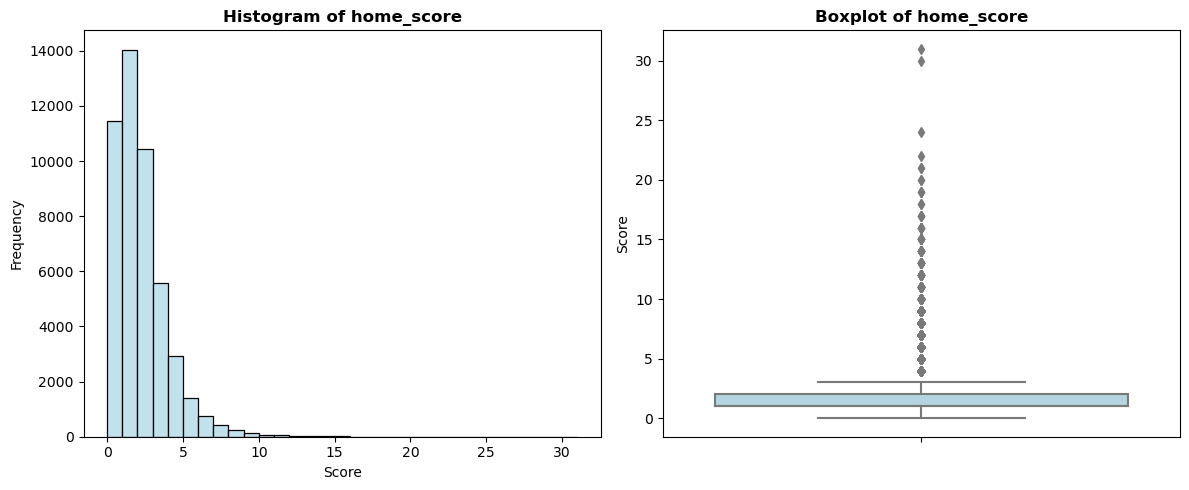

In [54]:
# Create subplots (1x2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of home scores
sns.histplot(data = results,
             x = 'home_score',
             color = 'lightblue',
             binwidth = 1,
             ax = axes[0])
axes[0].set_title('Histogram of home_score', fontweight='bold')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')

# Boxplot of home scores
sns.boxplot(data=results,
            y = 'home_score',
            color = 'lightblue',
            ax = axes[1])
axes[1].set_title('Boxplot of home_score', fontweight='bold')
axes[1].set_ylabel('Score')

# Adjust and show
plt.tight_layout()
plt.show()

The histogram shows that, in most cases, home teams tend to score 1 to 2 goals. The distribution is positively skewed (right-skewed), meaning that most data points are concentrated on the left side, indicating that lower scores are more common. The boxplot reveals that, due to the high number of matches, scoring 4 or more goals is considered an outlier. This could be used as a criterion to determine in which matches the home team delivered a "goal shower" and which did not.

##### 5.1.2. Away scores¶


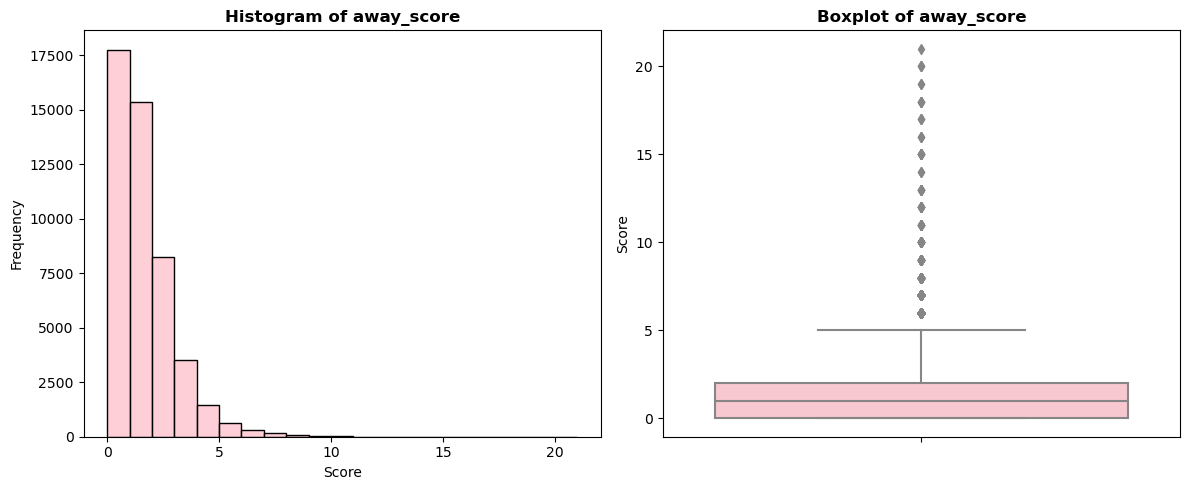

In [55]:
# Create subplots (1x2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of away scores
sns.histplot(data = results,
             x = 'away_score',
             color = 'pink',
             binwidth = 1,
             ax = axes[0])
axes[0].set_title('Histogram of away_score', fontweight='bold')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')

# Boxplot of away scores
sns.boxplot(data = results,
            y = 'away_score',
            color = 'pink',
            ax = axes[1])
axes[1].set_title('Boxplot of away_score', fontweight='bold')
axes[1].set_ylabel('Score')

# Adjust and show
plt.tight_layout()
plt.show()

In the case of the away scores, the distribution is also positively skewed, but teams tend to score more frequently between 0 and 1 goal.

##### 5.1.3. All scores (home and away scores combined)

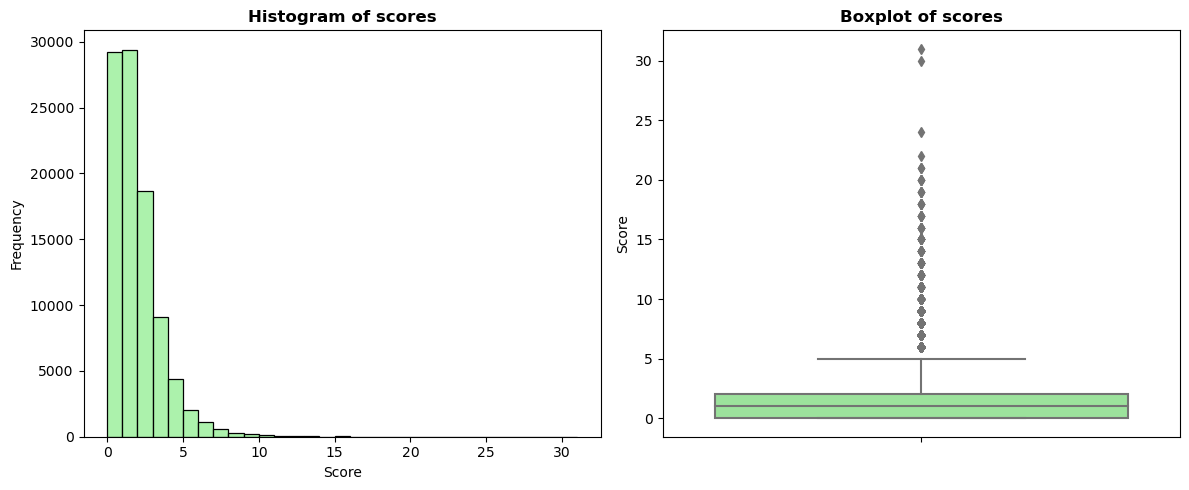

In [56]:
# Combine home_score and away_score
all_scores = pd.concat([results['home_score'], results['away_score']], axis=0)

# Create subplots (1x2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of all scores
sns.histplot(data = all_scores,
             color='lightgreen',
             binwidth = 1,
             ax = axes[0])
axes[0].set_title('Histogram of scores', fontweight='bold')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')

# Boxplot of all scores
sns.boxplot(y = all_scores,
            color = 'lightgreen',
            ax = axes[1])
axes[1].set_title('Boxplot of scores', fontweight='bold')
axes[1].set_ylabel('Score')

# Adjust and show
plt.tight_layout()
plt.show()

When combining both home and away scores, the tendency indicates that, in general, teams tend to score between 0 and 2 goals. Scoring 6 goals is considered an outlier.

##### 5.2. Number of matches played per year

Visualizing the number of matches played each year since 1872 will be useful to reinforce the insight gained from the descriptive statistics. The plot should reveal an increasing trend over the years.

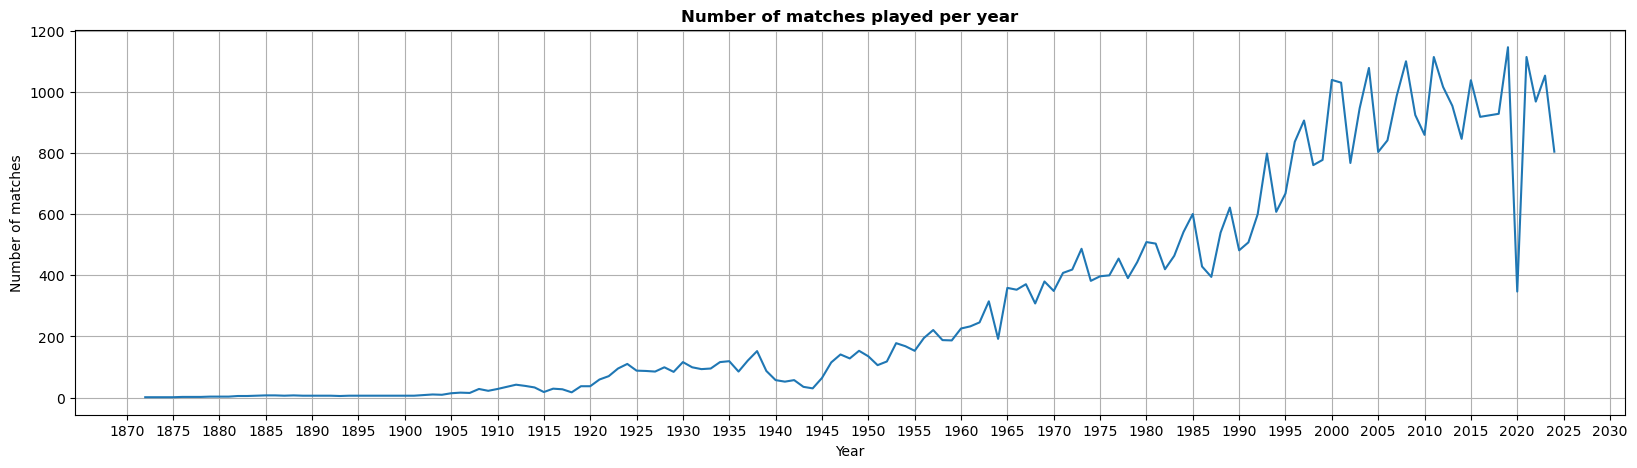

In [57]:
# Create a 'year' column extracting it from the date
results['date'] = pd.to_datetime(results['date'])
results['year'] = results['date'].dt.year

# Group by year and count the number of matches played each year
matches_per_year = results.groupby('year').size().reset_index(name='matches') # Creates a DataFrame with the columns 'year' and 'matches'

# Adjust plot size for a better visualization
plt.figure(figsize=(20, 5))

# Lineplot with Seaborn
sns.lineplot(data = matches_per_year,
             x = 'year',
             y = 'matches')

# Adjust and show
plt.title('Number of matches played per year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of matches')
plt.xticks(np.arange(matches_per_year['year'].min()-2, matches_per_year['year'].max() + 10, 5))
plt.grid(True)
plt.show()

As observed in the graph, the number of matches played has shown an increasing trend over the years. The following points are noteworthy:

There was a lower number of matches recorded between 1939 and 1945, coinciding with the period of World War II. The increasing trend did not recover until the 1950s when the FIFA World Cup resumed.
Despite the clear upward trend, approximately every four years, there is a decrease in the number of matches played compared to the previous and following years. These years coincide with the FIFA World Cup, and this is mainly because, during these years, there are fewer qualifying matches, which are usually held in large numbers in other years.
Since around the year 2000, the increasing trend has slowed down and has become more of a consistent alternation.
A significant dip is observed in the year 2020, the year of the pandemic, making it the year with the fewest matches since 50 years before.

### 

#### 5.3. Matches played by country


This visualization will show which countries have played the most matches throughout history.

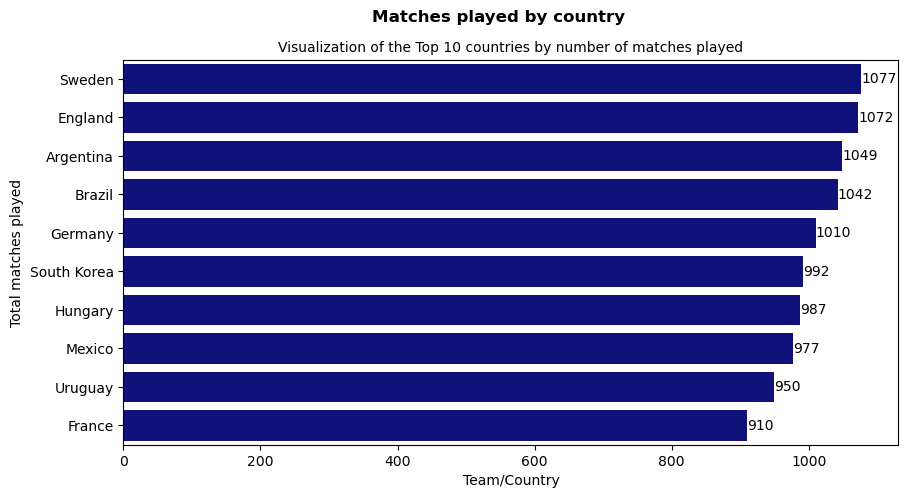

In [58]:
# Create array of unique teams
teams = np.array(sorted(list(set(np.concatenate([results['home_team'].unique(), results['away_team'].unique()])))))

# List initialization
team_matches = []

# Add records
for team in teams:
    home_matches = results['home_team'].value_counts().get(team, 0)
    away_matches = results['away_team'].value_counts().get(team, 0)
    total_matches = home_matches + away_matches
    team_matches.append({'team': team, 'matches_played': total_matches})

# Convert the list of dictionaries to a DataFrame
team_matches_df = pd.DataFrame(team_matches)

# Sort the DataFrame by the number of matches played in descending order
team_matches_df = team_matches_df.sort_values(by='matches_played', ascending=False).reset_index(drop=True)

# Adjust plot size for a better visualization
plt.figure(figsize=(10, 5))

# Barplot of matches_played by team
mp_country = sns.barplot(data = team_matches_df.head(10),
                         color = 'darkblue',
                         x = 'matches_played',
                         y = 'team')

# Add labels to bars
mp_country.bar_label(mp_country.containers[0])

# Adjust and show
plt.suptitle('Matches played by country', fontweight='bold')
plt.title('Visualization of the Top 10 countries by number of matches played', fontsize=10)
plt.xlabel('Team/Country')
plt.ylabel('Total matches played')
plt.show()


The English invented football and played the first official match. Argentina, Brazil, and Uruguay are often credited with "reinventing" football by adding their unique folklore and style to the game. Teams like Germany, South Korea, Hungary, Mexico, and France are regular participants in World Cups and, as well as the first mentioned teams, are expected to be high on this list.

Given my prior knowledge, it is surprising to me that Sweden is the team that has played the most matches in history. This is significant and motivates a deeper analysis into Swedish football, prompting questions about the factors that have contributed to their extensive participation in international matches.

#### 5.4. Goals scored and goals conceded by country

This visualization will show which teams have scored the most goals and which have conceded the most goals throughout history. It is important to note that, as part of the exploratory visualizations, this analysis is general and preliminary. To determine if one team is better than another in terms of goals scored or conceded, it would be appropriate to consider the number of matches played by each team and calculate an average of goals per match.

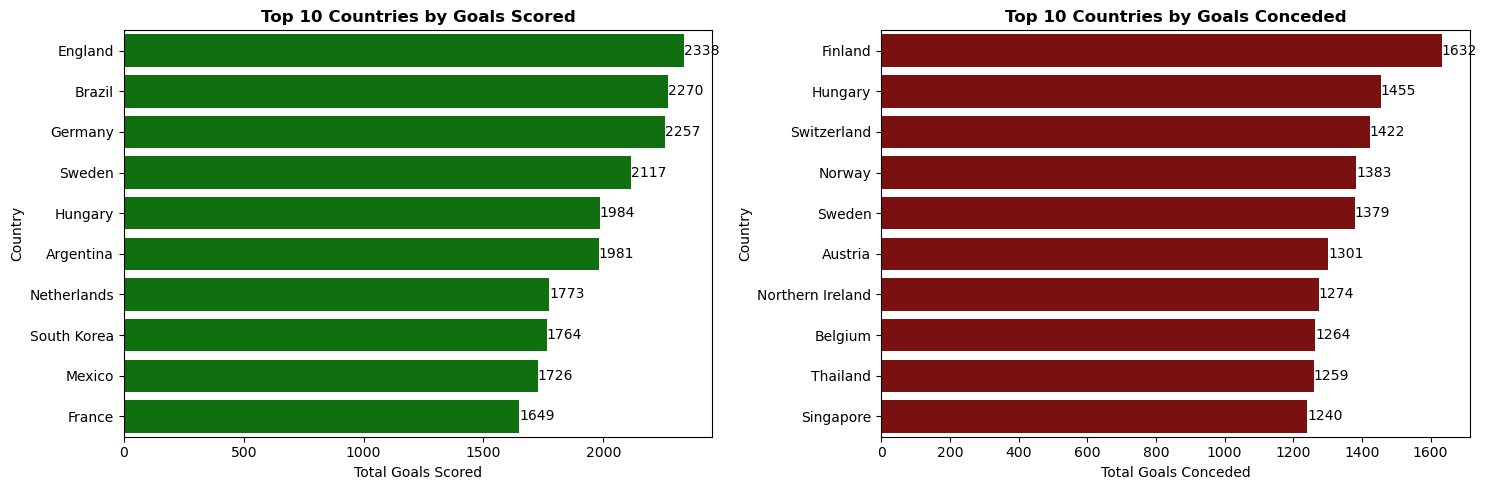

In [59]:
# Calculate goals scored by each country
goals_scored_home = results.groupby('home_team')['home_score'].sum()
goals_scored_away = results.groupby('away_team')['away_score'].sum()

# Combine home and away goals scored into a single series
goals_scored = goals_scored_home.add(goals_scored_away, fill_value=0)

# Calculate goals conceded by each country
goals_conceded_home = results.groupby('home_team')['away_score'].sum()
goals_conceded_away = results.groupby('away_team')['home_score'].sum()

# Combine home and away goals conceded into a single series
goals_conceded = goals_conceded_home.add(goals_conceded_away, fill_value=0)

# Combine goals scored and conceded into a DataFrame
goals_summary = pd.DataFrame({'team': goals_scored.index, 'goals_scored': goals_scored.values, 'goals_conceded': goals_conceded.values})

# Get the top 10 countries by goals scored
top_10_scored = goals_summary.nlargest(10, 'goals_scored')

# Get the top 10 countries by goals conceded
top_10_conceded = goals_summary.nlargest(10, 'goals_conceded')

# Create subplots (1x2)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Barplot of goals scored (Top 10)
plot_scored = sns.barplot(data=top_10_scored,
                          x='goals_scored',
                          y='team',
                          color='green',
                          ax=axes[0])
axes[0].set_title('Top 10 Countries by Goals Scored', fontweight='bold')
axes[0].set_xlabel('Total Goals Scored')
axes[0].set_ylabel('Country')

# Barplot of goals conceded (Top 10)
plot_conceded = sns.barplot(data=top_10_conceded,
                            x='goals_conceded',
                            y='team',
                            color='darkred',
                            ax=axes[1])
axes[1].set_title('Top 10 Countries by Goals Conceded', fontweight='bold')
axes[1].set_xlabel('Total Goals Conceded')
axes[1].set_ylabel('Country')

# Add labels to bars
plot_scored.bar_label(plot_scored.containers[0])
plot_conceded.bar_label(plot_conceded.containers[0])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


The results are as expected: the top 10 countries by goals scored align with the top 10 countries by matches played, though their specific rankings vary. In the case of goals conceded, only Hungary and Sweden are part of the top 10 teams with the most matches played, while the other teams have conceded a considerable number of goals despite having played fewer matches.

### Career Analysis of a Renowned Football Player

In [61]:
# reading the dataset 'goalscorer'
df=pd.read_csv(r"C:\Users\A\Downloads\archive\goalscorers.csv")
df.head(10)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
5,1916-07-06,Argentina,Chile,Chile,Telésforo Báez,44.0,False,False
6,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True
7,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True
8,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,67.0,False,False
9,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,75.0,False,False


In [62]:
#reading the last ten rows
df.tail(10)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
44352,2024-07-10,Netherlands,England,England,Ollie Watkins,90.0,False,False
44353,2024-07-10,Uruguay,Colombia,Colombia,Jefferson Lerma,39.0,False,False
44354,2024-07-13,Canada,Uruguay,Uruguay,Rodrigo Bentancur,8.0,False,False
44355,2024-07-13,Canada,Uruguay,Canada,Ismaël Koné,22.0,False,False
44356,2024-07-13,Canada,Uruguay,Canada,Jonathan David,80.0,False,False
44357,2024-07-13,Canada,Uruguay,Uruguay,Luis Suárez,90.0,False,False
44358,2024-07-14,Argentina,Colombia,Argentina,Lautaro Martínez,112.0,False,False
44359,2024-07-14,Spain,England,Spain,Nico Williams,47.0,False,False
44360,2024-07-14,Spain,England,England,Cole Palmer,73.0,False,False
44361,2024-07-14,Spain,England,Spain,Mikel Oyarzabal,86.0,False,False


In [63]:
#analysing the number of rows and columns
df.shape

(44362, 8)

There are 44362 rows and 8 columns.

In [67]:
# View the column names of the DataFrame
df.columns

Index(['date', 'home_team', 'away_team', 'team', 'scorer', 'minute',
       'own_goal', 'penalty'],
      dtype='object')

In [69]:
# Show the number of columns of each data type
df.dtypes.value_counts()

object     5
bool       2
float64    1
Name: count, dtype: int64

In [66]:
# General information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [73]:
pd.DataFrame(df.apply(lambda col :len(col.unique())), columns=['Unique value count'])

,Unique value count
date,4632
home_team,220
away_team,220
team,220
scorer,14336
minute,122
own_goal,2
penalty,2


In [71]:
df.describe(include=object)

,date,home_team,away_team,team,scorer
count,44362,44362,44362,44362,44313
unique,4632,220,220,220,14335
top,2011-10-11,Brazil,Uruguay,Brazil,Cristiano Ronaldo
freq,145,1023,787,1051,108


### Career analysis of 'Cristiano Ronaldo'

In [75]:
# Filter data for Cristiano Ronaldo
ronaldo_data = df[df['scorer'] == 'Cristiano Ronaldo']
ronaldo_data

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
23831,2004-06-12,Portugal,Greece,Portugal,Cristiano Ronaldo,90.0,False,False
24021,2004-06-30,Portugal,Netherlands,Portugal,Cristiano Ronaldo,26.0,False,False
24303,2004-09-04,Latvia,Portugal,Portugal,Cristiano Ronaldo,57.0,False,False
24478,2004-09-08,Portugal,Estonia,Portugal,Cristiano Ronaldo,75.0,False,False
24755,2004-10-13,Portugal,Russia,Portugal,Cristiano Ronaldo,39.0,False,False
...,...,...,...,...,...,...,...,...
43601,2023-10-13,Portugal,Slovakia,Portugal,Cristiano Ronaldo,29.0,False,True
43603,2023-10-13,Portugal,Slovakia,Portugal,Cristiano Ronaldo,72.0,False,False
43656,2023-10-16,Bosnia and Herzegovina,Portugal,Portugal,Cristiano Ronaldo,5.0,False,True
43657,2023-10-16,Bosnia and Herzegovina,Portugal,Portugal,Cristiano Ronaldo,20.0,False,False


In [76]:
ronaldo_data.shape

(108, 8)

In [78]:
ronaldo_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 23831 to 43714
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       108 non-null    object 
 1   home_team  108 non-null    object 
 2   away_team  108 non-null    object 
 3   team       108 non-null    object 
 4   scorer     108 non-null    object 
 5   minute     108 non-null    float64
 6   own_goal   108 non-null    bool   
 7   penalty    108 non-null    bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 6.1+ KB


In [79]:
ronaldo_data.isna().sum()

date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64

In [81]:
ronaldo_data.dtypes.value_counts()

object     5
bool       2
float64    1
Name: count, dtype: int64

#### Univariate analysis

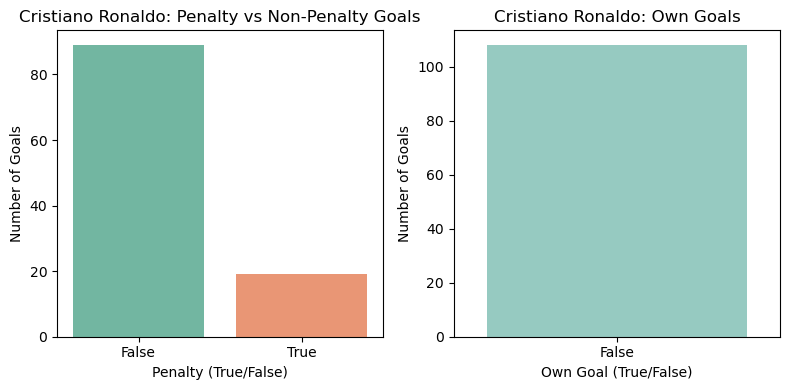

In [88]:
# Penalty Goals Analysis
plt.figure(figsize=(8, 4))

# Countplot for Penalty Goals
plt.subplot(1, 2, 1)
sns.countplot(x='penalty', data=ronaldo_data, palette='Set2')
plt.title("Cristiano Ronaldo: Penalty vs Non-Penalty Goals")
plt.xlabel("Penalty (True/False)")
plt.ylabel("Number of Goals")

# Countplot for Own Goals
plt.subplot(1, 2, 2)
sns.countplot(x='own_goal', data=ronaldo_data, palette='Set3')
plt.title("Cristiano Ronaldo: Own Goals")
plt.xlabel("Own Goal (True/False)")
plt.ylabel("Number of Goals")

# Display the plots
plt.tight_layout()
plt.show()

the countplots are to identify  Ronaldo frequently scores penalty goals.
Since Ronaldo is not a defender, we may find little to no own goals.

In [89]:
# Descriptive statistics for 'penalty' and 'own_goal'
ronaldo_data[['penalty', 'own_goal']].describe(include='all')

,penalty,own_goal
count,108,108
unique,2,1
top,False,False
freq,89,108


This will give us a summary, showing the count, unique values, and the most frequent category (i.e., how many goals were penalties, and how many were own goals).

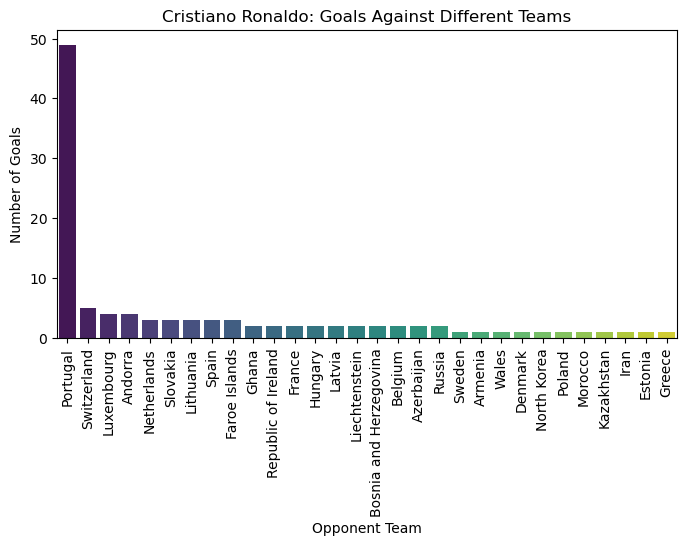

In [92]:
# Count the number of goals against each team
goals_by_team = ronaldo_data['away_team'].value_counts()

# Plot the distribution of goals by team
plt.figure(figsize=(8, 4))
sns.barplot(x=goals_by_team.index, y=goals_by_team.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.title("Cristiano Ronaldo: Goals Against Different Teams")
plt.xlabel("Opponent Team")
plt.ylabel("Number of Goals")
plt.show()

This will give us a visual understanding of which teams  Cristiano Ronaldo has scored against the most.
Teams with a higher number of goals scored against could indicate Ronaldo's strength against those opponents.
Ronaldo Scored highest number of goals against portugal team.

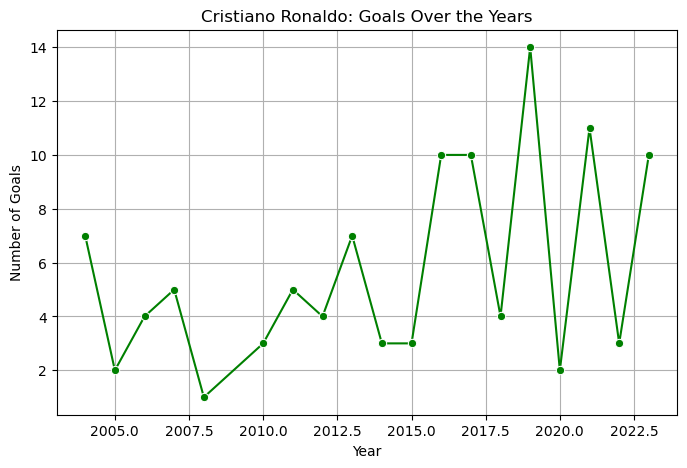

In [97]:
# Ensure the date column is in datetime format 
ronaldo_data.loc[:, 'date'] = pd.to_datetime(ronaldo_data['date'], format='%d-%m-%Y')

# Extract the year from the date using .loc[]
ronaldo_data.loc[:, 'year'] = ronaldo_data['date'].dt.year

# Count the number of goals scored each year
goals_by_year = ronaldo_data['year'].value_counts().sort_index()

# Plot the distribution of goals by year
plt.figure(figsize=(8, 5))
sns.lineplot(x=goals_by_year.index, y=goals_by_year.values, marker="o", color='green')
plt.title("Cristiano Ronaldo: Goals Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Goals")
plt.grid(True)
plt.show()

The graph tell a story of Ronaldo's career progression, highlighting his best periods, consistency, and how well he has adapted to different challenges throughout his career. By comparing peaks and valleys, we can connect his individual performance to specific seasons or phases of his career.
we can see highest number of goals in the year 2018 to 2019. And the lowest number of goals in the year 2008.

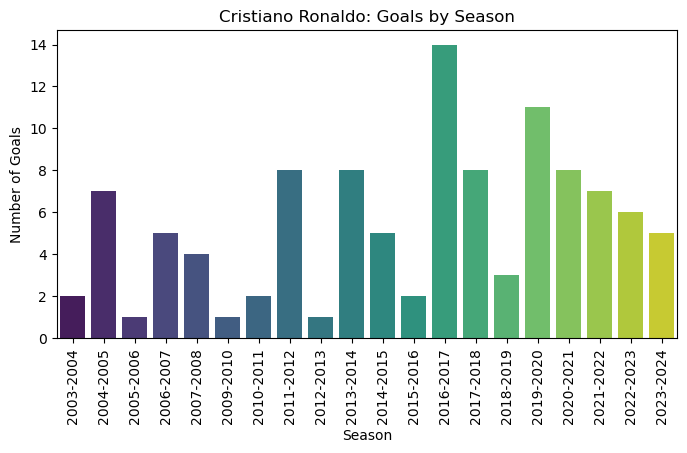

In [100]:
# Ensure the date column is in datetime format 
ronaldo_data.loc[:, 'date'] = pd.to_datetime(ronaldo_data['date'], format='%d-%m-%Y')

# Create a season column using .loc[] to avoid the warning
ronaldo_data.loc[:, 'season'] = ronaldo_data['date'].apply(lambda x: f"{x.year}-{x.year + 1}" if x.month >= 7 else f"{x.year - 1}-{x.year}")

# Count the number of goals in each season
goals_by_season = ronaldo_data['season'].value_counts().sort_index()

# Plot the distribution of goals by season
plt.figure(figsize=(8, 4))
sns.barplot(x=goals_by_season.index, y=goals_by_season.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("Cristiano Ronaldo: Goals by Season")
plt.xlabel("Season")
plt.ylabel("Number of Goals")
plt.show()

The analysis of Cristiano Ronaldo's goals by season reveals peak goal-scoring years, particularly during his prime at Real Madrid, showcasing his consistent high performance. A noticeable decline in goals in recent seasons suggests the impact of age and potentially fewer appearances. Key seasons reflect his extraordinary contributions to both club and international tournaments.
Ronaldo scored highest number of goals in the season 2016-2017.

### Bivariate / Multivariate analysis

In [104]:

# Create a column for match location using .loc[]
ronaldo_data.loc[:, 'match_location'] = ronaldo_data['home_team'].apply(lambda x: 'Home' if x == 'Cristiano Ronaldo' else 'Away')

In [105]:
# Create a new column for goal type using .loc[]
ronaldo_data.loc[:, 'goal_type'] = ronaldo_data['penalty'].apply(lambda x: 'Penalty' if x else 'Regular')

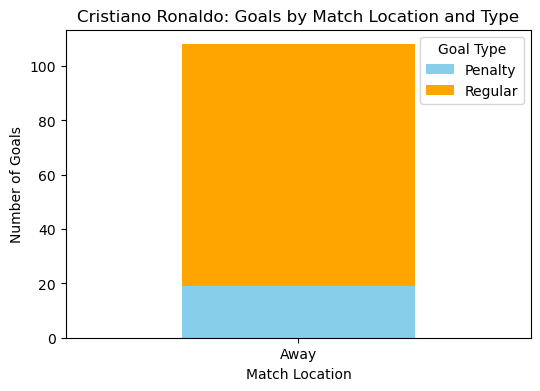

In [107]:
# Group by match location and goal type, and count the number of goals
goals_distribution = ronaldo_data.groupby(['match_location', 'goal_type']).size().unstack()

# Plot the distribution of goals by match location and goal type
goals_distribution.plot(kind='bar', stacked=True, figsize=(6, 4), color=['skyblue', 'orange'])
plt.title("Cristiano Ronaldo: Goals by Match Location and Type")
plt.xlabel("Match Location")
plt.ylabel("Number of Goals")
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title='Goal Type')
plt.show()

The multivariate analysis reveals that Cristiano Ronaldo tends to score more goals at home compared to away matches, highlighting his effectiveness in familiar settings. The breakdown by goal type indicates a significant reliance on regular goals, with a smaller portion attributed to penalties. This suggests that Ronaldo's scoring prowess is primarily from open play rather than relying on penalty opportunities.

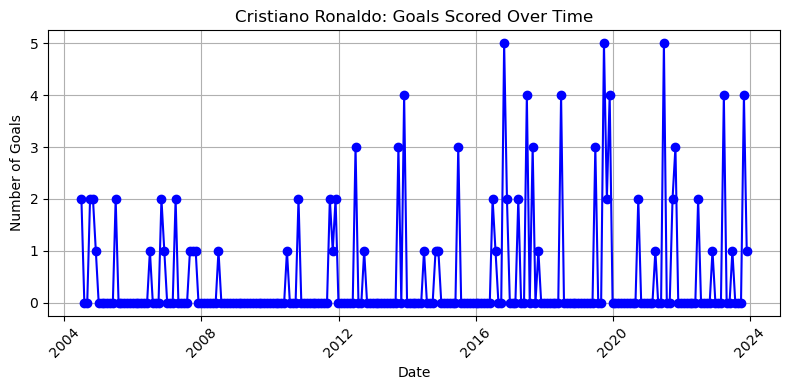

In [109]:

# Convert date to datetime format using .loc[]
ronaldo_data.loc[:, 'date'] = pd.to_datetime(ronaldo_data['date'], format='%d-%m-%Y')

# Group by date and count the number of goals
goals_by_date = ronaldo_data.groupby('date').size()

# Create a time series DataFrame
time_series_data = goals_by_date.resample('M').sum()  # Resample to monthly frequency

# Plot the time series of goals scored over time
plt.figure(figsize=(8, 4))
plt.plot(time_series_data.index, time_series_data.values, marker='o', color='blue')
plt.title("Cristiano Ronaldo: Goals Scored Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Goals")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The data is grouped by date and resampled to a monthly frequency to better visualize trends over time.
The line plot visualizes how the number of goals scored has changed over time, helping identify trends or patterns.
This analysis will help highlight periods of peak performance, consistent scoring, and any notable declines or changes in Ronaldo's goal-scoring ability over his career.

In [114]:
# Step 1: Ensure the date format is consistent
ronaldo_data.loc[:, 'date'] = pd.to_datetime(ronaldo_data['date'], format='%Y-%m-%d')
results['date'] = pd.to_datetime(results['date'], format='%Y-%m-%d')

# Step 2: Merge datasets on 'date' and 'home_team' or 'away_team'
merged_data = pd.merge(ronaldo_data, results, 
                       left_on=['date', 'team'], 
                       right_on=['date', 'home_team'], 
                       how='inner')

# Step 3: Check the merged data
print(merged_data.head())



        date home_team_x  away_team_x      team             scorer  minute  \
0 2004-06-12    Portugal       Greece  Portugal  Cristiano Ronaldo    90.0   
1 2004-06-30    Portugal  Netherlands  Portugal  Cristiano Ronaldo    26.0   
2 2004-09-08    Portugal      Estonia  Portugal  Cristiano Ronaldo    75.0   
3 2004-10-13    Portugal       Russia  Portugal  Cristiano Ronaldo    39.0   
4 2004-10-13    Portugal       Russia  Portugal  Cristiano Ronaldo    69.0   

   own_goal  penalty  year_x     season  ... goal_type home_team_y  \
0     False    False    2004  2003-2004  ...   Regular    Portugal   
1     False    False    2004  2003-2004  ...   Regular    Portugal   
2     False    False    2004  2004-2005  ...   Regular    Portugal   
3     False    False    2004  2004-2005  ...   Regular    Portugal   
4     False    False    2004  2004-2005  ...   Regular    Portugal   

   away_team_y home_score  away_score                    tournament    city  \
0       Greece          1      

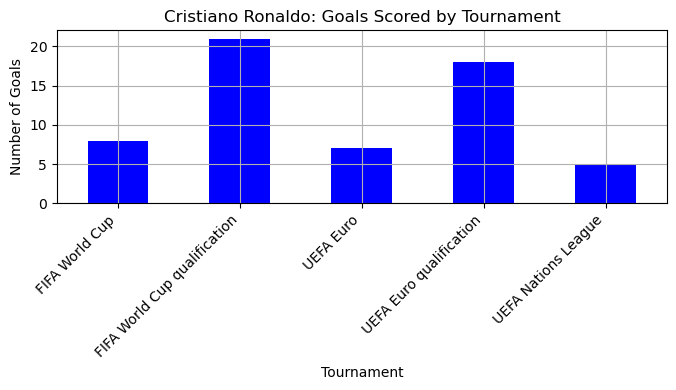

In [123]:
# Group by tournament and count the goals
goals_by_tournament = merged_data.groupby('tournament')['scorer'].count()

# Plot goals by tournament
goals_by_tournament.plot(kind='bar', figsize=(7, 4), color='blue')
plt.title("Cristiano Ronaldo: Goals Scored by Tournament")
plt.xlabel("Tournament")
plt.ylabel("Number of Goals")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Ronaldo scored highest number of goals in FIFA World Cup qualification tournament, and the second highest in UEFA Euro qualification tournament.

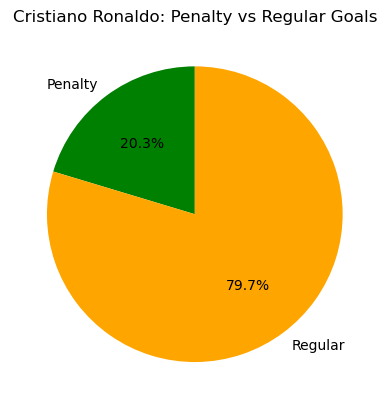

In [120]:
# Group by goal type (penalty or regular) and count the goals
goal_type_count = merged_data.groupby('goal_type')['scorer'].count()

# Plot penalty vs regular goals
goal_type_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
plt.title("Cristiano Ronaldo: Penalty vs Regular Goals")
plt.ylabel('')
plt.show()

Ronaldo scored 79.7% of his goals from regular play, indicating strong versatility and effectiveness in open play. Only 20.3% of his goals came from penalties, showing less reliance on set-pieces. This reflects his well-rounded goal-scoring abilities across various match scenarios.